In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np


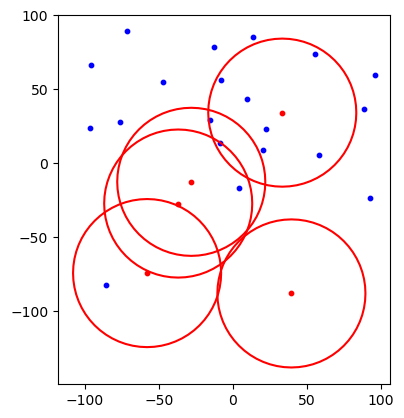

In [34]:

# Step 1: Create a 20 random GeoPandas Point Series and 5 random GeoPandas Circle Polygon Series each of radius 100
np.random.seed(0)
# data_points = gpd.GeoDataFrame([Point(np.random.uniform(-100, 100), np.random.uniform(-100, 100)) for _ in range(20)])
# circle_center = gpd.GeoDataFrame([Point(np.random.uniform(-100, 100), np.random.uniform(-100, 100)) for _ in range(5)])

data_points = gpd.GeoDataFrame({'geometry': [Point(np.random.uniform(-100, 100), np.random.uniform(-100, 100)) for _ in range(20)]})
circle_center = gpd.GeoDataFrame({'geometry': [Point(np.random.uniform(-100, 100), np.random.uniform(-100, 100)) for _ in range(5)]})

# Append 'wave height' column to circle_center
data_points['wave height'] = np.random.uniform(0.5, 7, len(data_points))

circle_center['wave height'] = None
check_distance=50

# Append 'wave height' column to circles

# buffer_circles = gpd.GeoDataFrame([Polygon(p.buffer(check_distance)) for p in circle_center[0][:5]])
buffer_circles = gpd.GeoDataFrame({'geometry': [Polygon(p.buffer(check_distance)) for p in circle_center['geometry']]})



buffer_circles


# Step 2: Visualize these 2 geospatial datasets on a map
fig, ax = plt.subplots()
data_points.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')
plt.show()


In [35]:
inside_points = data_points[data_points.within(buffer_circles.iloc[0]['geometry'])]
inside_points


,geometry,wave height
2,POINT (-15.26904 29.17882),6.924430
14,POINT (4.36966 -17.06761),1.777785
16,POINT (-8.76993 13.68679),5.836456


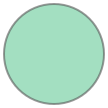

In [36]:
buffer_circles.iloc[0]['geometry']

In [37]:
# Ensure both GeoDataFrames are in the same CRS
#inside_points = inside_points.to_crs(circle_center.crs)

# Initialize a new column for distances
inside_points['distance'] = None
inside_points


c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geometry,wave height,distance
2,POINT (-15.26904 29.17882),6.924430,None
14,POINT (4.36966 -17.06761),1.777785,None
16,POINT (-8.76993 13.68679),5.836456,None


In [38]:

# Calculate distance
inside_points['distance'] = inside_points.geometry.distance(circle_center.geometry[0])
inside_points

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geometry,wave height,distance
2,POINT (-15.26904 29.17882),6.924430,43.698158
14,POINT (4.36966 -17.06761),1.777785,32.774887
16,POINT (-8.76993 13.68679),5.836456,32.622841


In [39]:
# Sort dgf1 by 'distance' in ascending order
sorted_inside_points = inside_points.sort_values(by='distance')

# Select the top 2 rows
top_two_points = sorted_inside_points.head(2)
top_two_points.iloc[1]
top_two_points

,geometry,wave height,distance
16,POINT (-8.76993 13.68679),5.836456,32.622841
14,POINT (4.36966 -17.06761),1.777785,32.774887


In [45]:
weight_power=1
weights= 1/(top_two_points['distance']**weight_power)
#numerator2=(weights.iloc[0]*top_two_points.iloc[0]['wave height']+weights.iloc[1]*top_two_points.iloc[1]['wave height'])
numerator=np.sum(weights*top_two_points['wave height'])
denominator= np.sum(weights)
value=numerator/denominator
print(value)
circle_center


3.8118387501940934


,geometry,wave height
0,POINT (-28.09842 -12.59361),None
1,POINT (39.52624 -87.95491),None
2,POINT (33.35334 34.12757),None
3,POINT (-57.92349 -74.21474),None
4,POINT (-36.91433 -27.25785),None


In [53]:
circle_center.at[0,'interpolated wave height']=value
circle_center

,geometry,wave height,interpolated wave height
0,POINT (-28.09842 -12.59361),None,3.811839
1,POINT (39.52624 -87.95491),None,NaN
2,POINT (33.35334 34.12757),None,NaN
3,POINT (-57.92349 -74.21474),None,NaN
4,POINT (-36.91433 -27.25785),None,NaN


In [ ]:
# Also possible to explore Kmeans for example

# Create a DataFrame with coordinates and corresponding values
data = {'latitude': [40.7128, 34.0522, 41.8781],
        'longitude': [-74.0060, -118.2437, -87.6298],
        'value': [10, 15, 20]}
df = pd.DataFrame(data)

print(df)

from sklearn.neighbors import KNeighborsRegressor

# Reshape the DataFrame to a 2D array
X = df[['latitude', 'longitude']].values.reshape(-1, 2)
y = df['value'].values

# Create and fit the model
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X, y)

# Define new points where you want to interpolate values
new_points = [[40.7128, -74.0060], [34.0522, -118.2437], [41.8781, -87.6298]]

# Predict values at new points
new_values = model.predict(new_points)

print(new_values)